**Analysis of insurance users - Final Project Probability Course Pacmann**

# Intro

Data provided as insurance.csv containing the following columns:

1. Age (Age of Users)
2. Sex (Gender of Users)
3. BMI (BMI of Users)
4. Children (Number of children covered by insurance)
5. Smoker (Smoking of Users)
6. The Region (Region of Users)
7. Charges (Cost of User)

It has a total of 1,338 lines.

From this data, it will be possible to see the correlation between the variables (columns) one with the other, so that it can be known which variables cause the user bills to be larger than others.

In [1]:
# Import tools needed
import pandas as pd
import numpy as np
import datetime as dt

# Import Library for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import ttest_ind

# Import Library to ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# connect to your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
insurance = pd.read_csv('/content/drive/MyDrive/dataset/insurance.zip')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset will be checked to ensure there are no empty values before any further analysis is done.

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no empty values in the available datasets, which gives direct access to analysis.

Do the following preview next.

In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1. Analysis of descriptive statistics

## 1.1 Average Age of Users

In [6]:
print('The average age of insurance users is', round(insurance['age'].mean(),0), 'year')

The average age of insurance users is 39.0 year


## 1.2 What is the average BMI value of those who smoke?

In [7]:
mean_bmi_smokers = insurance[(insurance['smoker'] == 'yes')]['bmi'].mean()
print(f"The average bmi of smokers is :{mean_bmi_smokers}")

The average bmi of smokers is :30.70844890510949


## 1.3 Is the variance of the health bills of smokers and non-smokers the same?

The data we need is
1. Charges for smokers
2. Charges for non-smokers

In [8]:
# Find the variation of smoking bills by creating a table
charges_smoker = insurance[insurance["smoker"]=="yes"][["charges"]].reset_index()
charges_smoker

,index,charges
0,0,16884.92400
1,11,27808.72510
2,14,39611.75770
3,19,36837.46700
4,23,37701.87680
...,...,...
269,1313,36397.57600
270,1314,18765.87545
271,1321,28101.33305
272,1323,43896.37630


In [9]:
# Filtering the data
charges_non_smoker = insurance[insurance["smoker"]=="no"][["charges"]].reset_index()
charges_non_smoker

,index,charges
0,1,1725.55230
1,2,4449.46200
2,3,21984.47061
3,4,3866.85520
4,5,3756.62160
...,...,...
1059,1332,11411.68500
1060,1333,10600.54830
1061,1334,2205.98080
1062,1335,1629.83350


In [10]:
# Create a variable with numpy.
var_charges_smoker = np.var(charges_smoker)
var_charges_smoker

index      1.642753e+05
charges    1.327212e+08
dtype: float64

In [11]:
# Create a variable with numpy.
var_charges_non_smoker = np.var(charges_non_smoker)
var_charges_non_smoker

index      1.452963e+05
charges    3.589166e+07
dtype: float64

Text(0.5, 0, 'Number of bills')

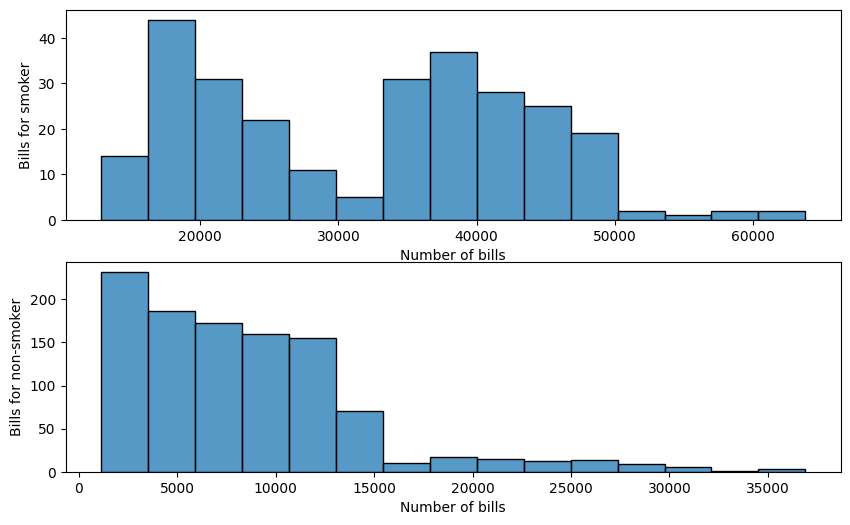

In [12]:
# Create a visualization for smoker and non-smoker
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
sns.histplot(charges_smoker["charges"], bins = 15 )
plt.ylabel('Bills for smoker')
plt.xlabel('Number of bills')


plt.subplot(2,1,2)
sns.histplot(charges_non_smoker["charges"], bins = 15)
plt.ylabel('Bills for non-smoker')
plt.xlabel('Number of bills')

## 1.4 Average Age for Male and Female Smoker

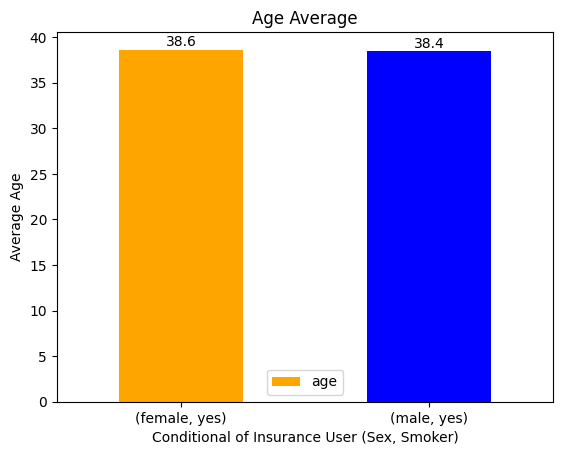

In [13]:
# Calculate the average age of male and female smokers
smoker_male = insurance.loc[(insurance['smoker'] == 'yes')&(insurance['sex'] =='male')]
smoker_female = insurance.loc[(insurance['smoker'] == 'yes')&(insurance['sex'] =='female')]
average_age_smoker = (insurance[insurance['smoker'].isin(['yes'])].groupby(['sex','smoker']).agg(np.mean))
ax = average_age_smoker.plot(kind="bar", y="age", title="Age Average", color=['orange', 'blue'])
rects = ax.patches

def add_value_labels(ax, spacing=0.5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Conditional of Insurance User (Sex, Smoker)")
plt.ylabel("Average Age")
plt.show()

## 1.5 Costs based on region

In [14]:
# Divide data by region: southwest, southeast, northwest, and northeast.
# Display the statistical descriptive value

charges_by_region = insurance.groupby('region')[['charges']].agg([len, min, max, 'mean', 'median'])
print(charges_by_region)

          charges                                                    
              len        min          max          mean        median
region                                                               
northeast     324  1694.7964  58571.07448  13406.384516  10057.652025
northwest     325  1621.3402  60021.39897  12417.575374   8965.795750
southeast     364  1121.8739  63770.42801  14735.411438   9294.131950
southwest     325  1241.5650  52590.82939  12346.937377   8798.593000


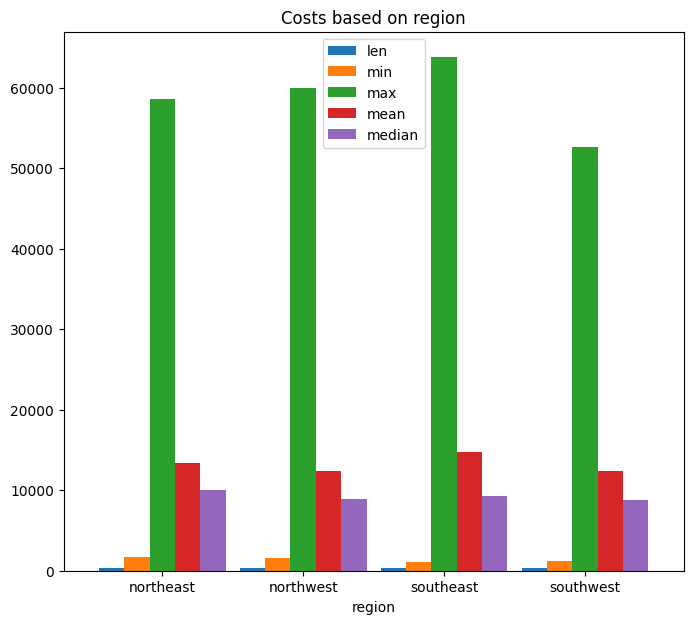

In [15]:
# Plot chart of costs by region

charges_by_region['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0,
                                 title='Costs based on region')
plt.show()

#2. Discrete Variable Analysis

Identify opportunities for certain conditions that have the potential to have a certain amount

## 2.1 Which gender has the highest billing?

In [16]:
# Grouping to find out the proportion of each gender
insurance.groupby(["sex"])[["charges"]].max()

,charges
sex,
female,63770.42801
male,62592.87309


women are paid more expensively than men

In [17]:
# add up the two genders in order to see the proportions of the two genders
total = 63770.42801 + 62592.87309
woman = 63770.42801

woman_proportion = woman/total
print(f'the proportion for women is: {woman_proportion}')

the proportion for women is: 0.5046594023333884


Proportion for woman based on data is 50,5%

## 2.2 What is the probability that a person who is a male is known to be a smoker?

In [18]:
# see the data
smoker = pd.crosstab(index = insurance["sex"],columns = insurance["smoker"],margins=True)
smoker

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [19]:
# Calculate the probability that the male is a smoker
male_smoker = 159
total_smoker = 274

probability_male_smoker = male_smoker / total_smoker
probability_male_smoker

0.5802919708029197

the chance of men smoking based on the data is 58%

## 2.3 What is the probability that a person is known to be a woman who smokes?

In [20]:
# Calculate the probability that the female is a smoker
female_smoker = 115
total_smoker = 274

probability_female_smoker = female_smoker / total_smoker
probability_female_smoker

0.4197080291970803

the chance of men smoking based on the data is 42%

## 2.4 Distribution of billing odds in each region?

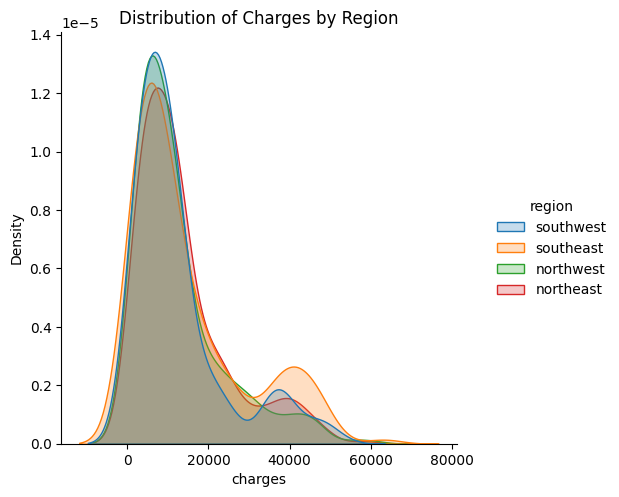

In [21]:
# Distribusi peluang tagihan di tiap-tiap region

sns.displot(insurance, x="charges", hue="region", kind="kde", legend=True, fill=True)
plt.title('Distribution of Charges by Region')
plt.show()

Many people from these four regions are charged between 0 - 20000

## 2.5 Does each region have the same proportion of people data?

In [22]:
# Displays the proportions of the four regions
count_by_region = insurance['region'].value_counts()
total_count = len(insurance)
proportion_by_region = count_by_region / total_count
if (proportion_by_region - proportion_by_region.mean()).abs().max() < 0.01:
    print("Each region has the same proportion of data for many people.")
    print(proportion_by_region)
else:
    print("Each region does not have the same proportion of data for many people.")
    print(proportion_by_region)

Each region does not have the same proportion of data for many people.
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


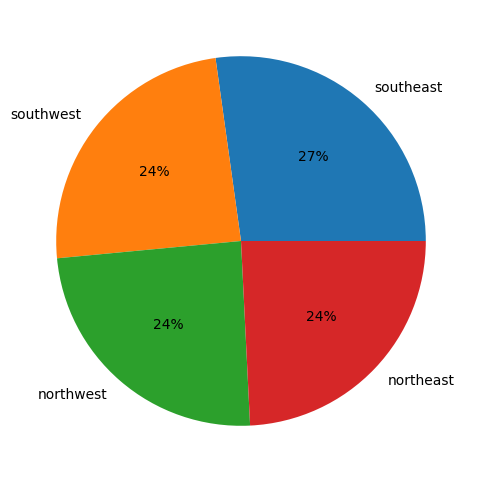

In [23]:
plt.figure(figsize=(10,6))

label = [
    "southeast",
    "southwest",
    "northwest",
    "northeast"
    ]

plt.pie(proportion_by_region,labels = label, autopct = '%.0f%%')
plt.show()

The southeast has a 3% higher population percentage than the other 3 areas, measured in percentage terms.

# 3. Continuous Variable Analysis

## 3.1 Which is more likely to occur


> A. Someone with a BMI over 25 gets a health bill over 16.7k, or

> B. Someone with a BMI below 25 gets a health bill above 16.7k

In [24]:
# Calculate the proportion of data with a BMI above 25 and health bills above 16.7k
prop_a = ((insurance['bmi'] > 25) & (insurance['charges'] > 16700)).sum() / len(insurance)

# Calculate the proportion of data with a BMI below 25 and health bills above 16.7k
prop_b = ((insurance['bmi'] < 25) & (insurance['charges'] > 16700)).sum() / len(insurance)

print('Proportion of case A occur:', prop_a)
print('Proportion of case B occur:', prop_b)

Proportion of case A occur: 0.21150971599402094
Proportion of case B occur: 0.03811659192825112


## 3.1 Which is more likely to occur



> A. A smoker with a BMI above 25 gets a health bill above 16.7k, or

> B. A non-smoker with a BMI over 25 gets a health bill above 16.7k





In [25]:
# Case A
a = len(insurance[(insurance['smoker'] == 'yes') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)])

# Case B
b = len(insurance[(insurance['smoker'] == 'no') & (insurance['bmi'] > 25) & (insurance['charges'] > 16700)])

# Proportion of case A
prop_a = a / len(insurance)

# Proportion of case A
prop_b = b / len(insurance)

print("Proportion of case A occur:", prop_a)
print("Proportion of case B occur:", prop_b)

Proportion of case A occur: 0.16068759342301944
Proportion of case B occur: 0.05082212257100149


# 4. Variable Correlation Analysis

After addressing the conditions that are more likely to result in higher health bills than the previous step. We can also look for connections between these conditions and health bills. Correlation analysis will be required here. You can choose to check the correlation of health bills with at least 2 other variables.

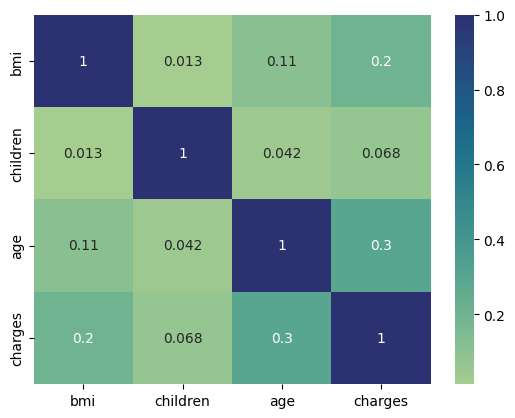

In [26]:
corr = insurance[['bmi', 'children', 'age', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

In this issue, we wish to examine the relationship between three numerical variables—BMI, children, and age—and health insurance costs(charges). According to the correlation matrix plot, the age variable has a pretty strong positive correlation (0.3) when compared to the other two variables, which indicates that it is one of the crucial factors that affects how much a certain bill will cost.

# 5. Hypothesis test

The selected hypothesis is
1. Smokers' health bills are higher than non-smokers' health bills
2. Health bills with a BMI above 25 are higher than health bills with a BMI below 25
3. Men's health bills are bigger than women's

## 5.1 Smokers' health bills are higher than non-smokers' health bills

**Hipotesis :**
1. 𝐻0: Smoker's Health Bill >= non-smoker health bills
2. 𝐻1: Smoker's Health Bill < non-smoker health bills

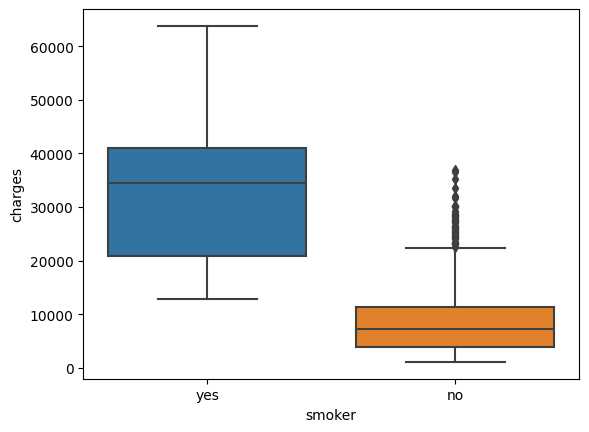

t-value: 32.751887766341824
p-value: 5.88946444671698e-103
There is not enough evidence to reject the null hypothesis


In [27]:
# Create a boxplot to display the distribution of smokers' and non-smokers' health bills
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.show()

# Calculate the p-value using the independent t-test
smoker = insurance[insurance['smoker'] == 'yes']['charges']
non_smoker = insurance[insurance['smoker'] == 'no']['charges']
t, p = ttest_ind(smoker, non_smoker, equal_var=False)

# Display the results of hypothesis testing
print('t-value:', t)
print('p-value:', p)
if p > 0.05:
    print('The null hypothesis was rejected, there is a significant difference between the health bills of smokers and non-smokers')
else:
    print('There is not enough evidence to reject the null hypothesis')

In [28]:
smoker = insurance[insurance['smoker'] == 'yes']['charges']
non_smoker = insurance[insurance['smoker'] == 'no']['charges']

# Calculate the p-value using the independent t-test
stat, p = ttest_ind(a = smoker, b = non_smoker, equal_var=False, alternative='greater') # equal_var= False karena varians kedua populasi berbeda

# Interpretation of Results
print('Statistics = %.4f, p-value = %.4f' % (stat, p))

# Decision making
if p > 0.05:
    print("The null hypothesis failed to be rejected, there is no significant difference between the health bills of smokers and non-smokers")
else:
    print("The alternative hypothesis is accepted, smokers' health bills are higher than non-smokers' health bills")

Statistics = 32.7519, p-value = 0.0000
The alternative hypothesis is accepted, smokers' health bills are higher than non-smokers' health bills


In [29]:
print(smoker.var())
print(non_smoker.var())
print(smoker.mean())
print(non_smoker.mean())

133207311.20634924
35925420.496111736
32050.23183153284
8434.268297856204


In [30]:
len(smoker)

274

In [31]:
from scipy.stats import norm

# input data
mean1 = 32050.23183153285
mean2 = 8440.660306508935
var1 = 133207311.20634921
var2 = 35915734.96876324
n1 = 274
n2 = 1063

# Calculate z-score
num = mean1 - mean2
denom = np.sqrt((var1/n1) + (var2/n2))
z_score = num / denom

# Determine the critical value
alpha = 0.05
df = n1 + n2 - 2
z_alpha = norm.ppf(1 - alpha/2, loc=0, scale=1)

# Compare with critical value
if z_score > z_alpha:
    print("H0 is rejected. The average bill of a smoker is higher than the average bill of a non-smoker.")
else:
    print("H0 is not rejected. There is insufficient evidence to suggest that the average bill of smokers is higher than the average bill of non-smokers.")

H0 is rejected. The average bill of a smoker is higher than the average bill of a non-smoker.


In [32]:
z_alpha

1.959963984540054

## 5.2 Health bills with a BMI above 25 are higher than health bills with a BMI below 25

**Hipotesis :**
1. 𝐻0: Health bills with a BMI above 25 >= health bills with a BMI below 25
2. 𝐻1: Health bills with BMI above 25 < Health bills with BMI below 25

In [33]:
# filter data by BMI above 25 and below 25
above_bmi = insurance[insurance['bmi'] > 25]['charges']
below_bmi = insurance[insurance['bmi'] <= 25]['charges']

# uji hipotesis
alpha = 0.05
t_stat, p_val = ttest_ind(above_bmi, below_bmi)

if p_val < alpha:
    print('Significance level: {}'.format(alpha))
    print('t-value: {}'.format(t_stat))
    print('p-value: {}'.format(p_val))
    print('The alternative hypothesis is accepted, health bills with a BMI above 25 are higher than health bills with a BMI below 25')
else:
    print('Significance level: {}'.format(alpha))
    print('t-value: {}'.format(t_stat))
    print('p-value: {}'.format(p_val))
    print('The null hypothesis is accepted, there is no significant difference between health bills with a BMI above 25 and health bills with a BMI below 25')

Significance level: 0.05
t-value: 4.319946909530397
p-value: 1.6761321969419405e-05
The alternative hypothesis is accepted, health bills with a BMI above 25 are higher than health bills with a BMI below 25


## 5.3 Men's health bills are bigger than women's

**Hipotesis :**
1. 𝐻0: Men's Health Bill >= Woman's health bills
2. 𝐻1: Men's Health Bill < Woman's health bills

In [34]:
# Create male and female data subsets
male_insurance = insurance[insurance['sex'] == 'male']
female_insurance = insurance[insurance['sex'] == 'female']

# Calculate the mean medical bills for each group
male_mean_charge = male_insurance['charges'].mean()
female_mean_charge = female_insurance['charges'].mean()

# Test the mean difference using the t-test
t, p = ttest_ind(male_insurance['charges'], female_insurance['charges'])
print('t-value:', t)
print('p-value:', p)

if p < 0.05:
    print('The alternative hypothesis is accepted, male health bills are greater than female')
else:
    print('The null hypothesis is accepted, there is no significant difference between male and female health bills')

t-value: 2.097546590051688
p-value: 0.03613272100592976
The alternative hypothesis is accepted, male health bills are greater than female
